# Specific power

Compare specific power as reported by Wiser et al 2019 to data from USWTDB. Note that this is average specific power for turbines per installation year, not (weighted) average specific power for turbines _operating_ in a certain year.

In [1]:
from init import *

In [2]:
matplotlib.rc('figure', figsize=(15, 10))

In [3]:
turbines = load_turbines()

In [4]:
rotor_swept_area = turbines.t_rd**2 / 4 * np.pi
specific_power_uswtdb = (turbines.t_cap * KILO_TO_ONE / rotor_swept_area).groupby(turbines.p_year).mean()

In [5]:
# values from Wiser et al. 2019, manually guessed from figure in PDF, might be a bit off
specific_power_wiser_etal = xr.DataArray([400, 400, 395, 395, 380, 380, 340, 340, 335,
                                          330, 335, 330, 310, 320, 280, 260, 250, 240,
                                          230, 225, 225],
                                         dims='p_year',
                                         coords={'p_year': np.arange(1998, 2019, dtype=float)})

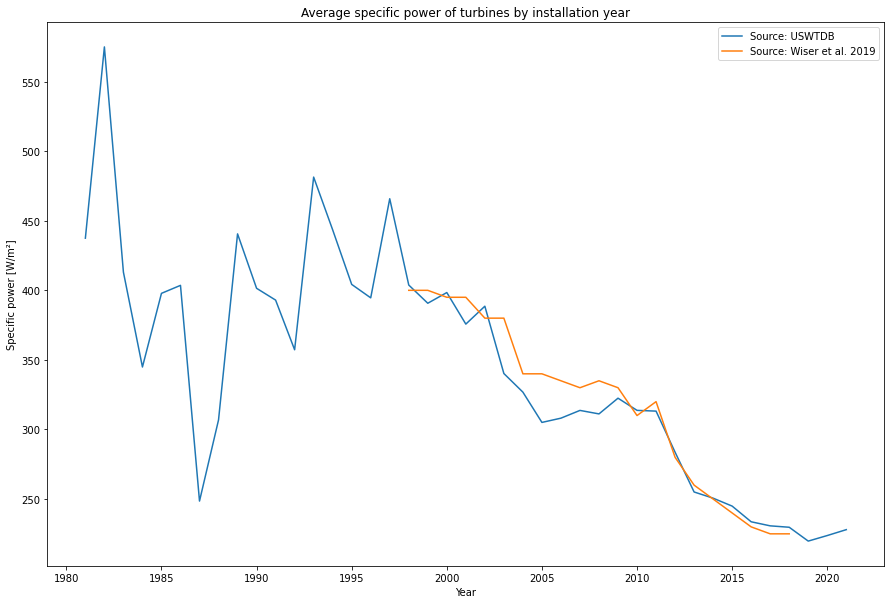

In [6]:
specific_power_uswtdb.plot.line(label='Source: USWTDB')
specific_power_wiser_etal.plot.line(label='Source: Wiser et al. 2019')

plt.title('Average specific power of turbines by installation year')
plt.ylabel('Specific power [W/m²]')
plt.xlabel('Year');
plt.legend();

Note: This is the average of specific powers for all turbines built in a specific year, i.e. the plot shows $s_t$ for $t=1980,...,2019$:

$$
    s_t = \frac{1}{|L|} \sum_{l\in L} \frac{C_{l,t}}{A_{l,t}}
$$

One could also calculate the specific power of the average rotor diameter and capacity:

$$
    \tilde{s}_t = \frac{\sum_{l\in L} C_{l,t}}{ \sum_{l\in L} A_{l,t}} = \sum_{l\in L}  \frac{A_{l,t}}{\sum_{k\in L} A_{k,t}} \frac{C_{l,t}}{A_{l,t}} 
$$

This would lead to a slightly different result, which can be interpreted as the weighted average (weighted by rotor swept area), while the other is just the average.

One could also look at the specific power of all turbines operating in a certain per instead of those commissioned in a certain year (this is similar to the `cumsum()` or integral of the plotted curve). This is what is used in Figure 1 of the paper.